In [1]:
from EmotionData import *
import math

In [2]:
train = EmotionData("data/fer2013.csv", "data/labels_new.csv")

TypeError: Invalid shape (48, 48, 1) for image data

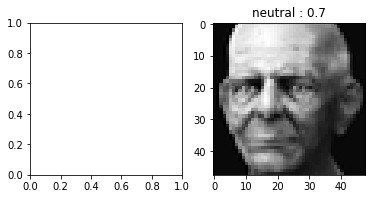

In [3]:
train.showData()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [5]:
len(train.classes)

10

In [6]:
model = Sequential([
    Input( (48, 48, 1)),
    Conv2D(10, (6, 6), padding='same'),
    MaxPooling2D((6, 6), padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(10, (6, 6), padding='same'),
    MaxPooling2D((6, 6), padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(10, (6, 6), padding='same'),
    MaxPooling2D((6, 6), padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    
    Flatten(),
    Dense(4096, activation="sigmoid"),
    Dense(10, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 10)        370       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 10)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 10)          40        
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 10)          3610      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 10)          4

In [7]:
dataGen = train.getGen(64)
x, y = next(dataGen)
print(x.shape, y.shape)

(64, 48, 48, 1) (64, 10)


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
n = len(train.data)
model.fit_generator(dataGen, steps_per_epoch = math.ceil(n//64), epochs=5)

In [ ]:
train.getLabel(4)

In [ ]:
X, Y = train.getWhole(laplacian=True)